In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1. Data Overview

In [2]:
df = pd.read_csv("data/initiatives.csv")
df

,Initiative,Cost ($),Engineering Days,ARR Impact (%),Churn Reduction (%),Confidence
0,Subscription Tracker,50000,15,5,2,High
1,Savings Coach AI,70000,25,8,3,Medium
2,US Expansion Campaign,100000,10,12,0,Low
3,In-app Rewards,30000,8,4,2,Medium
4,Churn Reactivation Flow,40000,12,3,5,High
5,Smart Budget Nudges,45000,10,4,4,High
6,Credit Score Booster Tips,35000,6,3,2,Medium
7,LLM-based Financial Coach,100000,30,11,2,Low
8,Friends Savings Challenge,25000,5,3,3,Medium
9,Referral Incentive Program,55000,10,6,3,High


In [6]:
from ui.config import BASE_ARR, CONFIDENCE_MULTIPLIER

In [7]:
df["Confidence Multiplier"] = df["Confidence"].map(CONFIDENCE_MULTIPLIER)
df["Expected ARR Impact ($)"] = BASE_ARR * (df["ARR Impact (%)"]/100)* df["Confidence Multiplier"]
df["ROI"] = (df["Expected ARR Impact ($)"] - df["Cost ($)"]) / df["Cost ($)"].round(2)
df

,Initiative,Cost ($),Engineering Days,ARR Impact (%),Churn Reduction (%),Confidence,Confidence Multiplier,Expected ARR Impact ($),ROI
0,Subscription Tracker,50000,15,5,2,High,1.00,500000.0,9.000000
1,Savings Coach AI,70000,25,8,3,Medium,0.75,600000.0,7.571429
2,US Expansion Campaign,100000,10,12,0,Low,0.50,600000.0,5.000000
3,In-app Rewards,30000,8,4,2,Medium,0.75,300000.0,9.000000
4,Churn Reactivation Flow,40000,12,3,5,High,1.00,300000.0,6.500000
5,Smart Budget Nudges,45000,10,4,4,High,1.00,400000.0,7.888889
6,Credit Score Booster Tips,35000,6,3,2,Medium,0.75,225000.0,5.428571
7,LLM-based Financial Coach,100000,30,11,2,Low,0.50,550000.0,4.500000
8,Friends Savings Challenge,25000,5,3,3,Medium,0.75,225000.0,8.000000
9,Referral Incentive Program,55000,10,6,3,High,1.00,600000.0,9.909091


/tmp/ipykernel_29373/2543190405.py:30: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/tmp/ipykernel_29373/2543190405.py:31: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.savefig("visuals/initiative_performance.png", dpi=300, bbox_inches='tight')
/home/ilse/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


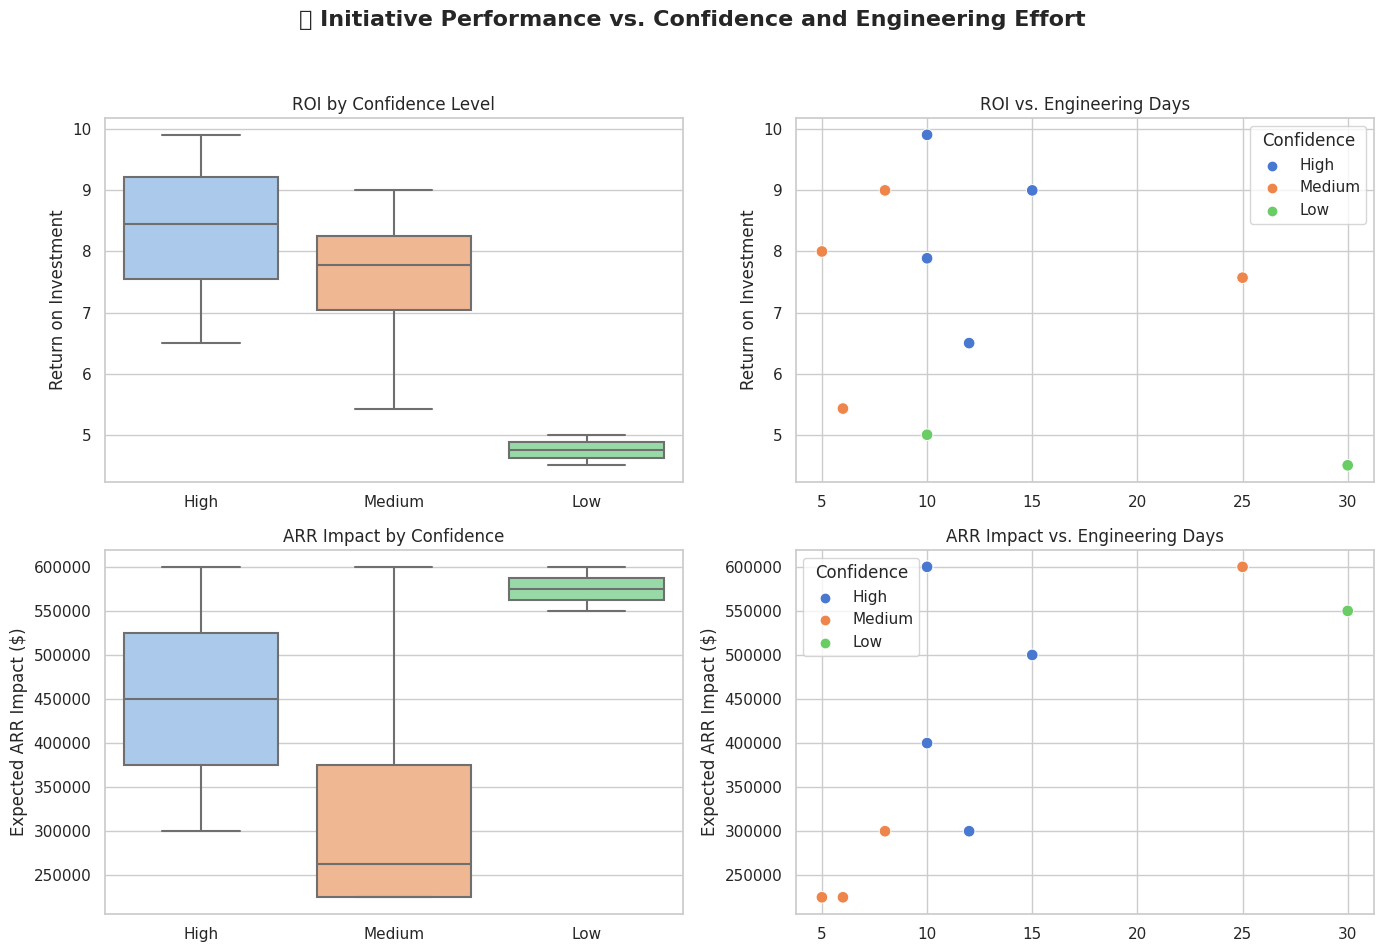

In [8]:
# vizualization plots
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("📊 Initiative Performance vs. Confidence and Engineering Effort", fontsize=16, fontweight='bold')

# --- ROI by Confidence ---
sns.boxplot(data=df, x="Confidence", y="ROI", ax=axes[0, 0], palette="pastel")
axes[0, 0].set_title("ROI by Confidence Level")
axes[0, 0].set_ylabel("Return on Investment")

# --- ROI vs Engineering Days (continuous) ---
sns.scatterplot(data=df, x="Engineering Days", y="ROI", hue="Confidence", ax=axes[0, 1], palette="muted", s=70)
axes[0, 1].set_title("ROI vs. Engineering Days")
axes[0, 1].set_ylabel("Return on Investment")

# --- ARR by Confidence ---
sns.boxplot(data=df, x="Confidence", y="Expected ARR Impact ($)", ax=axes[1, 0], palette="pastel")
axes[1, 0].set_title("ARR Impact by Confidence")
axes[1, 0].set_ylabel("Expected ARR Impact ($)")

# --- ARR vs Engineering Days (continuous) ---
sns.scatterplot(data=df, x="Engineering Days", y="Expected ARR Impact ($)", hue="Confidence", ax=axes[1, 1], palette="muted", s=70)
axes[1, 1].set_title("ARR Impact vs. Engineering Days")
axes[1, 1].set_ylabel("Expected ARR Impact ($)")

# --- Final formatting ---
for ax in axes.flat:
    ax.set_xlabel("")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("visuals/initiative_performance.png", dpi=300, bbox_inches='tight')
plt.show()

ROI by confidence level:
- High & Medium confidence initiatives have a much higher median ROI (~7.5–8) compared to Low confidence, which clusters around ~5.
- The spread is larger for High/Medium, suggesting more variance in success, but also higher upside.
- Low confidence initiatives appear consistently low ROI — very little upside or variation.

ROI by engineering days:
- There's no strong linear relationship between engineering effort and ROI.
- High ROI can come from both low and mid engineering days.
- Low-confidence initiatives are towards the bottom (low ROI), regardless of engineering effort.

ARR by confidence level:
- High-confidence initiatives tend to have both higher median and upper-bound ARR impact.
- Medium confidence initiatives have more spread and lower ARR.
- Low confidence initiatives have high ARR too — but paired with low ROI (top-left chart).

ARR by engineering days:
- Higher ARR does often require more engineering days (but not always). 
- There are a few standout low-effort / high-impact initiatives — rare but highly valuable.
- Low-confidence initiatives also show up at the top of ARR — but recall from above: low ROI!

In [9]:
df.nlargest(5, "ROI")[["Initiative", "ROI", "Expected ARR Impact ($)"]]

,Initiative,ROI,Expected ARR Impact ($)
9,Referral Incentive Program,9.909091,600000.0
0,Subscription Tracker,9.000000,500000.0
3,In-app Rewards,9.000000,300000.0
8,Friends Savings Challenge,8.000000,225000.0
5,Smart Budget Nudges,7.888889,400000.0


## 2. Setup Distributions - Based on Confidence

In [10]:
# mapping standard deviations for confidence (low risk = narrow distribution, high risk is wide distribution)
confidence_to_std = {
    "High": 0.10,
    "Medium": 0.20,
    "Low": 0.40
}

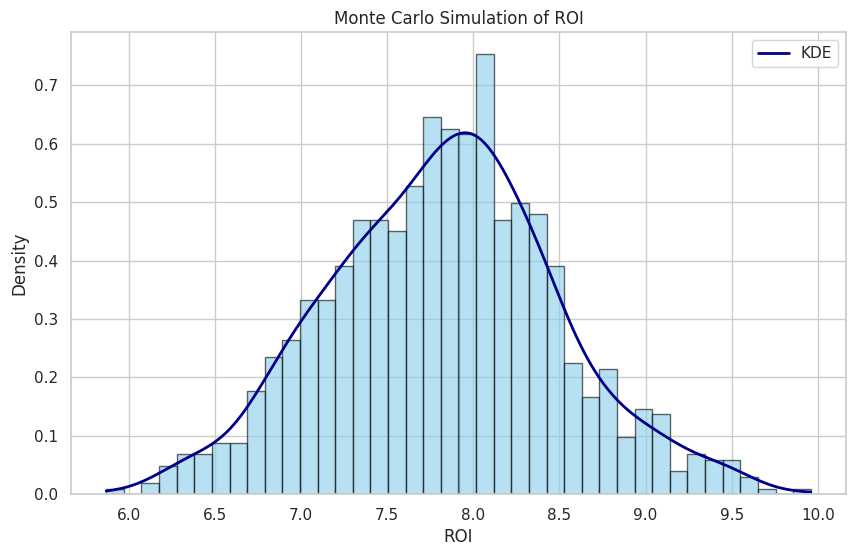

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


# Create ARR_std column based on confidence level
df["ARR_std"] = df.apply(
    lambda row: row["Expected ARR Impact ($)"] * confidence_to_std.get(row["Confidence"], 0.20),
    axis=1
)

# Monte Carlo simulation function
def run_simulation(df, n_runs=1000):
    roi_results = []

    for _ in range(n_runs):
        total_arr = 0
        total_cost = 0

        for _, row in df.iterrows():
            arr_sample = np.random.normal(loc=row["Expected ARR Impact ($)"], scale=row["ARR_std"])
            arr_sample = max(arr_sample, 0)  # Clamp to 0 to avoid negative ARR
            total_arr += arr_sample
            total_cost += row["Cost ($)"]

        roi = total_arr / total_cost if total_cost > 0 else 0
        roi_results.append(roi)

    return roi_results

# Run the simulation
roi_simulated = run_simulation(df)

# Histogram
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(roi_simulated, bins=40, color='skyblue', edgecolor='black', alpha=0.6, density=True)

# KDE overlay (optional)
kde = gaussian_kde(roi_simulated)
x_vals = np.linspace(min(roi_simulated), max(roi_simulated), 200)
plt.plot(x_vals, kde(x_vals), color='darkblue', linewidth=2, label='KDE')

# Titles and formatting
plt.title("Monte Carlo Simulation of ROI")
plt.xlabel("ROI")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.savefig("visuals/monte_carlo_roi.png", dpi=300, bbox_inches='tight')
plt.show()